### 1. 폴더에서 사진고르고 색 추출 후 표에 저장

In [142]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def extract_central_rgb(image_path):
    image = Image.open(image_path)
    width, height = image.size
    central_pixel = image.getpixel((width // 2, height // 2))
    return central_pixel

def load_images_from_folder(folder_path,keyword):
    image_paths = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') and filename.startswith(keyword):
            image_paths.append(os.path.join(folder_path, filename))
    return image_paths

keyword ='fixed'
pH = 4.0
folder_path = f"C:/Users/USER/Desktop/pH/fixed/{pH}"
image_paths = load_images_from_folder(folder_path,keyword)

data = []

for image_path in image_paths:
    judge_value = 'error'
    # 이미지 파일 제목에서 pH 추출
    name = os.path.splitext(os.path.basename(image_path))[0]
    pH_value = os.path.splitext(os.path.basename(image_path))[0].split('_')[2]
    if(4.8<=float(pH_value)<=5.6):
        judge_value = 'danger'
    elif (5.7<=float(pH_value)<=6.0):
        judge_value = 'warning'
    elif (6.1<=float(pH_value)<=6.4):
        judge_value = 'safe'
        
    # 중앙 부분의 RGB 값을 추출
    rgb = extract_central_rgb(image_path)
    
    # 튜플로 데이터 생성
    image_data = (judge_value, pH_value, rgb[0], rgb[1], rgb[2], name)
    
    # 데이터 추가
    data.append(image_data)

# Extracting data for plotting
judge_values = [item[0] for item in data]
pH_values = [item[1] for item in data]
R_values = [item[2] for item in data]
G_values = [item[3] for item in data]
B_values = [item[4] for item in data]
name = [item[5] for item in data]

for item in data:
    print(f"name:{item[5]}, judge:{item[0]}, pH:{item[1]} - R:{item[2]}, G:{item[3]}, B:{item[4]}")
    
#data dataframe로 저장    
df = pd.DataFrame(data, columns=['judge','pH', 'R', 'G', 'B','Name'])

# DataFrame을 Excel 파일로 저장
excel_filename = 'output_data.csv'
df.to_csv(excel_filename, index=False)
print(f"DataFrame이 {excel_filename}로 저장되었습니다.")

name:fixed_pH_4.0_1_1, judge:error, pH:4.0 - R:117, G:119, B:79
name:fixed_pH_4.0_1_10, judge:error, pH:4.0 - R:113, G:121, B:82
name:fixed_pH_4.0_1_2, judge:error, pH:4.0 - R:110, G:112, B:75
name:fixed_pH_4.0_1_3, judge:error, pH:4.0 - R:108, G:114, B:78
name:fixed_pH_4.0_1_4, judge:error, pH:4.0 - R:112, G:121, B:90
name:fixed_pH_4.0_1_5, judge:error, pH:4.0 - R:110, G:116, B:82
name:fixed_pH_4.0_1_6, judge:error, pH:4.0 - R:109, G:110, B:70
name:fixed_pH_4.0_1_7, judge:error, pH:4.0 - R:115, G:116, B:74
name:fixed_pH_4.0_1_8, judge:error, pH:4.0 - R:112, G:118, B:82
name:fixed_pH_4.0_1_9, judge:error, pH:4.0 - R:114, G:120, B:76
name:fixed_pH_4.0_2_1, judge:error, pH:4.0 - R:107, G:113, B:77
name:fixed_pH_4.0_2_10, judge:error, pH:4.0 - R:109, G:114, B:74
name:fixed_pH_4.0_2_2, judge:error, pH:4.0 - R:112, G:117, B:77
name:fixed_pH_4.0_2_3, judge:error, pH:4.0 - R:112, G:118, B:84
name:fixed_pH_4.0_2_4, judge:error, pH:4.0 - R:109, G:116, B:83
name:fixed_pH_4.0_2_5, judge:error, pH

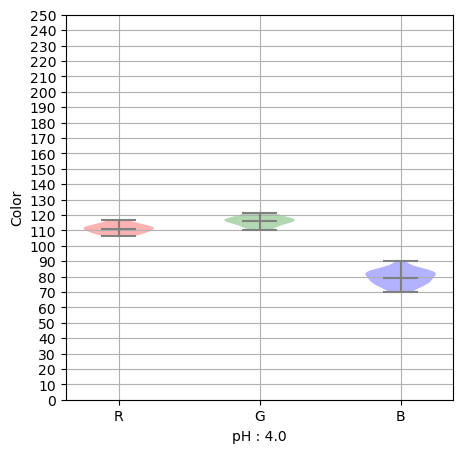

In [143]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10

# 3. 그래프 그리기
fig, ax = plt.subplots()
violin = ax.violinplot(df[['R', 'G', 'B']], showmeans=True)
ax.set_ylim(30, 150)
ax.set_xticks(np.arange(1, 4))
ax.set_xticklabels(['R', 'G', 'B'])
ax.set_xlabel(f'pH : {pH}')
ax.set_ylabel('Color')
ax.set_yticks(np.arange(0, 256, 10))
ax.grid(True)

violin['bodies'][0].set_facecolor('red')
violin['bodies'][1].set_facecolor('green')
violin['bodies'][2].set_facecolor('blue')

violin['cbars'].set_edgecolor('gray')#전체 범위
violin['cmaxes'].set_edgecolor('gray')#max
violin['cmins'].set_edgecolor('gray')#min
violin['cmeans'].set_edgecolor('gray')#평균
    
output_filename = f"{pH}violin_plot.png"
output_filepath = os.path.join(folder_path, output_filename)
plt.savefig(output_filepath)
plt.show()
